In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from utils import update_clusters, assign_clusters, pred_cluster,check_has_converged

In [2]:
K = 3

In [3]:
# Generate the data points

X, y = make_blobs(n_samples=500, n_features=2, centers=K, random_state=1)

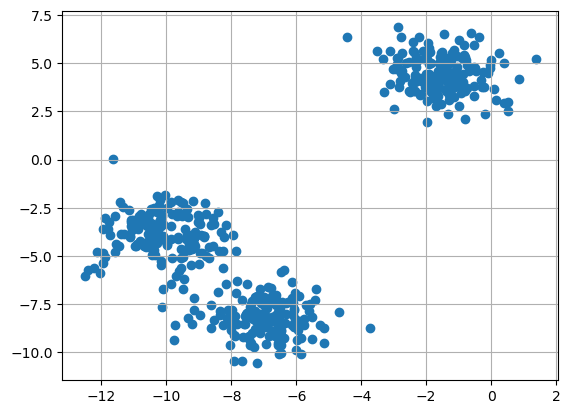

In [4]:
# Plot the data points

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
clusters = {} 
np.random.seed(23) 
k=3
for i in range(K):     
    center = 2*(2*np.random.random((X.shape[1],))-1)     
    points = []     
    cluster = {'center' : center,'points' : [] }     
    clusters[i] = cluster      

In [7]:
new_clust = clusters
new_clust = assign_clusters(X, new_clust,K)
new_clust = update_clusters(X, new_clust,K)
prev_clusters = clusters

while True:
    new_clust = assign_clusters(X, new_clust,K)
    new_clust = update_clusters(X, new_clust,K)

    if check_has_converged(prev_clusters, new_clust):
        print("Algorithm has converged")
        break
    else:
        print(prev_clusters, new_clust)
        print("Algorithm has not converged")

Algorithm has converged


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


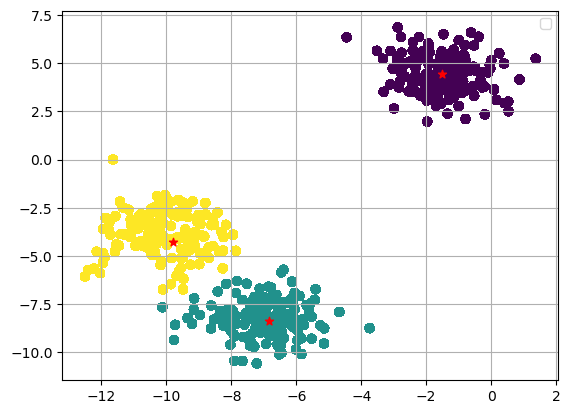

In [17]:
colors = ["b", "g", "r"]  # Colors for each cluster
markers = ["o", "s", "v"]  # Markers for each cluster

# Predict the cluster for each data point
pred = pred_cluster(X, clusters, K)

for i in range(len(pred)):
    plt.scatter(X[:, 0], X[:, 1], c=pred)

for i in clusters:
    center = clusters[i]["center"]
    plt.scatter(center[0], center[1], marker="*", c="red")

plt.legend()
plt.grid(True)